# Code by Viswaksena-35

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [8]:
# Get the image from pinetools.com
def format_binary():
    img = Image.open("fig1.png")
    gray = img.convert('L')
    gray_array = np.array(gray)
    binary_array = np.where(gray_array > 128, 1.0, 0.0)
    return binary_array

image_array = format_binary()

print(image_array)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


[[  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 ...
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]]


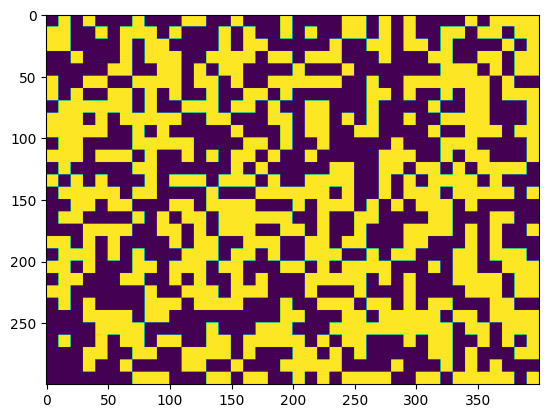

In [6]:
# View the image
rescaled_array = image_array * 255
print(rescaled_array)
rgb_image = np.array(rescaled_array, dtype=np.uint8)
plt.imshow(rgb_image)
plt.show()

No path found.


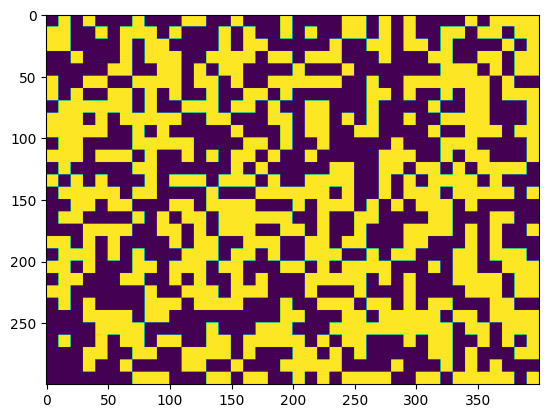

In [7]:
# Get B matrix
def getB(yaw,dt):
  B = np.array([[np.cos(yaw)*dt, 0],
   [np.sin(yaw)*dt, 0],
    [0, dt]])
  return B

# Functions outputs floor value of the state_estimate_t
# Takes input : yaw_angle(in deg) and state_estimate_t_minus_1
# dt = 1.5, v = 1.0, w = 0.0
def next_state(yaw_angle, state_estimate_t_minus_1):
    control_vector_t_minus_1 = np.array([1.0, 0.0])
    A_t_minus_1 = np.array([[1.0, 0, 0],
                        [ 0,1.0, 0],
                        [ 0, 0, 1.0]])
    delta_t = 1.5
    state_estimate_t = A_t_minus_1 @ (
      state_estimate_t_minus_1) + (
      getB(np.deg2rad(yaw_angle), delta_t)) @ (
      control_vector_t_minus_1) 
    return list(map(math.floor, state_estimate_t))

# This function finds the path from [0, 0] to [54, 54]
# Adds the index through which it travel in path list
# Already traversed path value is updated to 0.5, which helps for visualization
def find_path(matrix, path, state):
    n = len(matrix)
    row = state[0]
    col = state[1]
    if row == n - 1 and col == n - 1:
        matrix[row, col] = 0.5
        path.append((row, col))
        return True
    if row >= 0 and col >= 0 and row < n and col < n and matrix[row, col] == 1.0:
        path.append((row, col))
        matrix[row, col] = 0.5
        if(find_path(matrix, path, next_state(45, state)) or
           find_path(matrix, path, next_state(0, state)) or
           find_path(matrix, path, next_state(90, state)) or
           find_path(matrix, path, next_state(135, state)) or
           find_path(matrix, path, next_state(-45, state)) or
           find_path(matrix, path, next_state(45, state)) or
           find_path(matrix, path, next_state(180, state)) or
           find_path(matrix, path, next_state(-90, state)) or
           find_path(matrix, path, next_state(-135, state))):
            return True
        path.pop()
    return False

# Prints the path traversed
def trace_path(matrix):
    n = len(matrix)
    path = []

    if not find_path(matrix, path, [0,0,0]):
        print("No path found.")
        return

    print("Path from [0,0] to [N-1,N-1]:")
    for row, col in path:
        print(f"[{row},{col}]")

if __name__ == "__main__":
    bmp_array = format_binary()
    trace_path(bmp_array)
    # Plots the image for visualization
    rescaled_array = bmp_array * 255
    rgb_image = np.array(rescaled_array, dtype=np.uint8)
    plt.imshow(rgb_image)